In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv('pao_osfp_stats.csv')
df['1p_in'] = df['1p'] / df['1p_sum']
df['2p_in'] = df['2p'] / df['2p_sum']
df['3p_in'] = df['3p'] / df['3p_sum']

### ΠΑΙΧΤΕΣ ΤΟΥ ΠΑΝΑΘΗΝΑΙΚΟΥ ΜΕ ΠΕΡΙΣΣΟΤΕΡΟΥΣ ΑΠΟ 12 ΠΟΝΤΟΥΣ ΚΑΙ 3 ΑΣΣΙΣΤ ΣΕ ΚΑΠΟΙΟ ΑΓΩΝΑ

In [30]:
#df.loc[(df['Points'] >= 12) & (df['Assists'] >= 3) & (df['Team'] == 'pao')]
df.query('Team == "pao" & Points >= 12 & Assists >= 3' )

,Game,Team,Player,Points,Rebounds,Assists,Steals,Turnovers,1p,1p_sum,2p,2p_sum,3p,3p_sum,Minutes,Won,1p_in,2p_in,3p_in
24,three,pao,James,16.00,3.00,3.00,0.00,2.00,5.00,5.00,1.00,6.00,3.00,5.00,23.40,olympiakos,1.00,0.17,0.60
43,four,pao,Calathes,14.00,1.00,4.00,2.00,2.00,0.00,0.00,4.00,5.00,2.00,4.00,27.17,panathinaikos,nan,0.80,0.50
54,five,pao,Calathes,12.00,4.00,3.00,2.00,2.00,0.00,0.00,3.00,6.00,2.00,6.00,30.01,panathinaikos,nan,0.50,0.33


### ΕΜΦΑΝΙΣΗ ΤΩΝ ΠΑΙΧΤΩΝ ΠΟΥ ΕΒΑΛΑΝ ΠΕΡΙΣΣΟΤΕΡΟΥΣ ΑΠΟ 15 ΠΟΝΤΟΥΣ ΣΕ ΚΑΠΟΙΟ ΑΓΩΝΑ

In [33]:
#df.loc[df['Points'] >= 15 ]
#df[df['Points'] >= 15]
df.query('Points >= 15')

,Game,Team,Player,Points,Rebounds,Assists,Steals,Turnovers,1p,1p_sum,2p,2p_sum,3p,3p_sum,Minutes,Won,1p_in,2p_in,3p_in
1,one,pao,Rivers,16.00,4.00,2.00,0.00,0.00,1.00,1.00,3.00,7.00,3.00,5.00,29.33,olympiakos,1.00,0.43,0.60
15,two,pao,Pappas,16.00,0.00,1.00,0.00,0.00,9.00,9.00,2.00,2.00,1.00,2.00,15.40,panathinaikos,1.00,1.00,0.50
24,three,pao,James,16.00,3.00,3.00,0.00,2.00,5.00,5.00,1.00,6.00,3.00,5.00,23.40,olympiakos,1.00,0.17,0.60
67,two,osfp,Grin,21.00,3.00,0.00,1.00,0.00,2.00,3.00,2.00,5.00,5.00,6.00,27.19,panathinaikos,0.67,0.40,0.83
76,two,osfp,Printezis,15.00,6.00,5.00,1.00,2.00,3.00,4.00,3.00,12.00,2.00,5.00,30.05,panathinaikos,0.75,0.25,0.40
91,four,osfp,Grin,20.00,1.00,2.00,1.00,4.00,5.00,5.00,3.00,5.00,3.00,5.00,23.29,panathinaikos,1.00,0.60,0.60


#### FUNCTION ΠΟΥ ΕΠΙΤΡΕΠΕΙ ΤΗΝ ΕΙΣΑΓΩΓΗ ΟΝΟΜΑΤΟΣ ΠΑΙΧΤΗ ΚΑΙ ΣΤΑΤΙΣΤΙΚΟΥ ΠΟΥ ΕΠΙΘΥΜΟΥΜΕ ΚΑΙ ΕΠΙΣΤΡΕΦΕΙ ΤΗΝ ΣΥΝΟΛΙΚΗ ΤΙΜΗ

In [50]:
paixtis = lambda x,y: df.loc[df['Player'] == x , y].sum()

In [51]:
paixtis('Printezis', 'Points')

47.0

##### FUNCTION ΠΟΥ ΕΠΙΤΡΕΠΕΙ ΤΗΝ ΕΙΣΑΓΩΓΗ  ΟΝΟΜΑΤΟΣ ΠΑΙΧΤΗ ΚΑΙ ΕΠΙΣΤΡΕΦΕΙ ΤΑ ΣΤΑΤΙΣΤΙΚΑ ΤΟΥ ΣΕ ΚΑΘΕ ΑΓΩΝΑ ΧΩΡΙΣΤΑ

In [135]:
player_stats = lambda x: df.loc[(df['Player'] == x)]

In [136]:
player_stats('James')

,Game,Team,Player,Points,Rebounds,Assists,Steals,Turnovers,1p,1p_sum,2p,2p_sum,3p,3p_sum,Minutes,Won,1p_in,2p_in,3p_in
2,one,pao,James,6.00,4.00,4.00,0.00,2.00,2.00,2.00,2.00,7.00,0.00,4.00,25.46,olympiakos,1.00,0.29,0.00
13,two,pao,James,14.00,2.00,2.00,0.00,1.00,6.00,8.00,4.00,7.00,0.00,0.00,22.47,panathinaikos,0.75,0.57,nan
24,three,pao,James,16.00,3.00,3.00,0.00,2.00,5.00,5.00,1.00,6.00,3.00,5.00,23.40,olympiakos,1.00,0.17,0.60
35,four,pao,James,13.00,3.00,0.00,2.00,0.00,9.00,10.00,2.00,7.00,0.00,1.00,24.06,panathinaikos,0.90,0.29,0.00
46,five,pao,James,11.00,10.00,6.00,0.00,2.00,2.00,3.00,3.00,6.00,1.00,4.00,30.13,panathinaikos,0.67,0.50,0.25


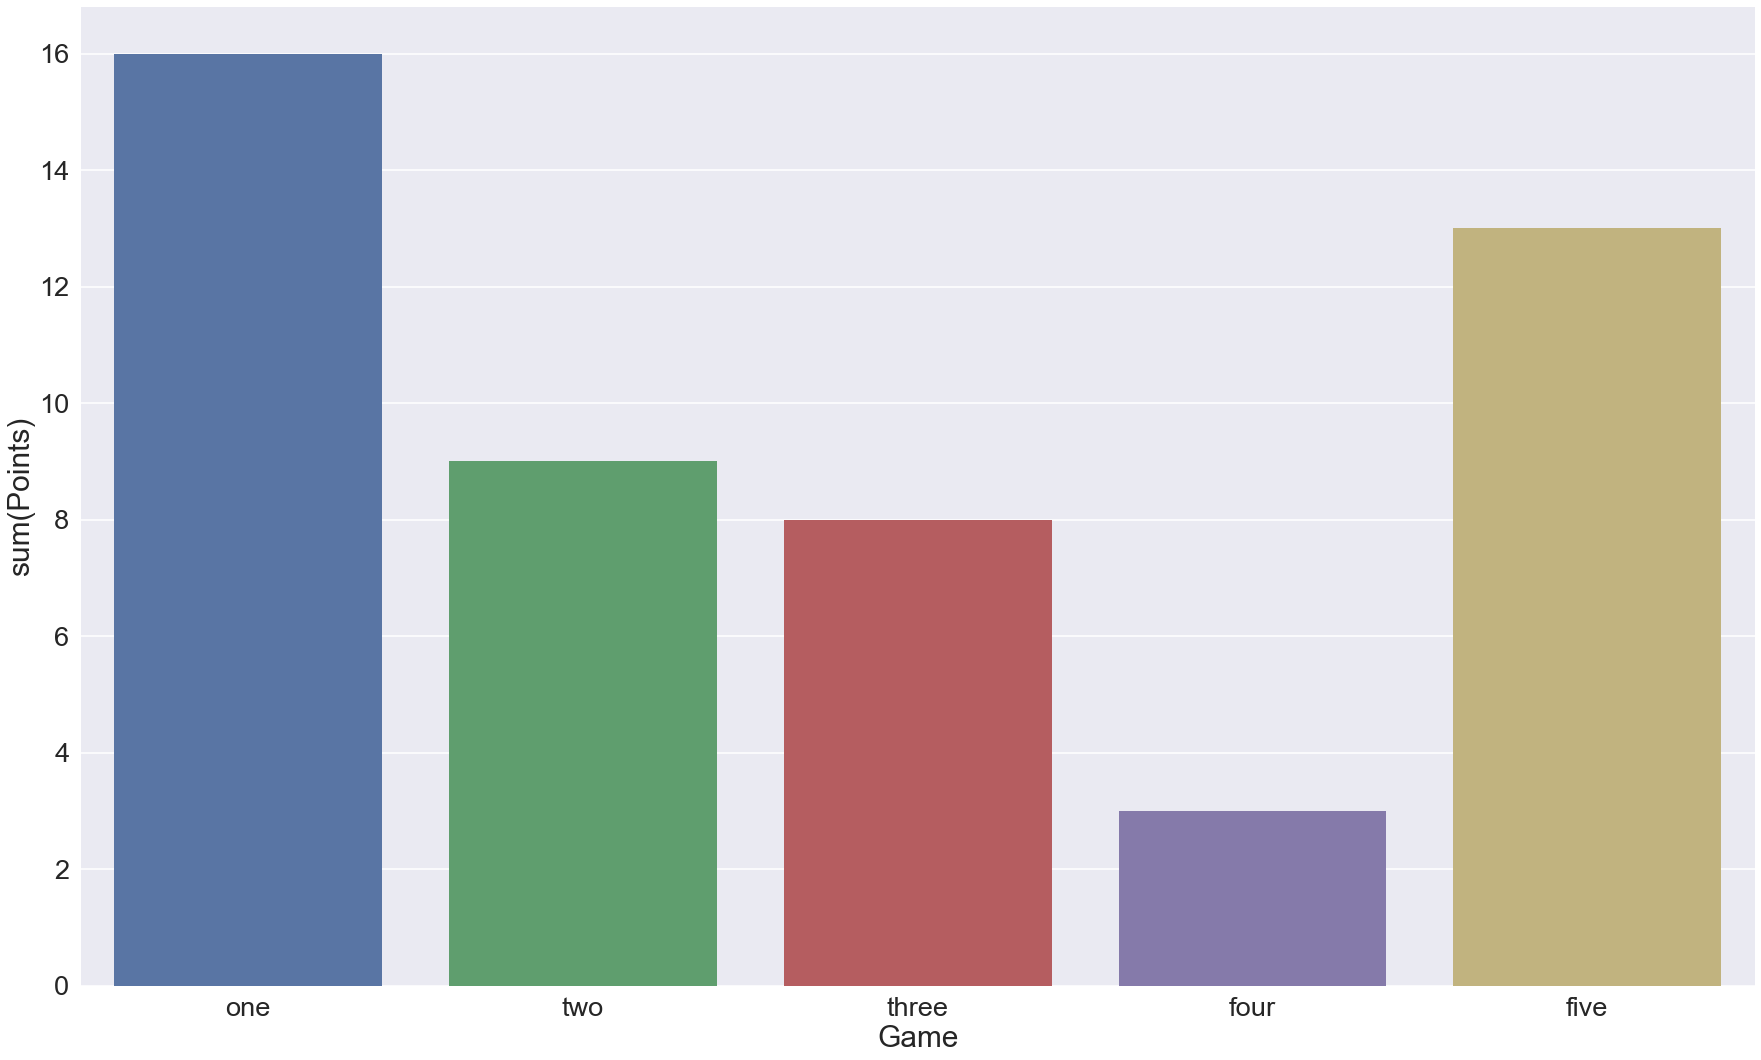

In [137]:
stats_tou = player_stats('Rivers')
plt.figure(figsize=(30,18))
sns.set_context('poster',font_scale=1.7)
sns.barplot(x='Game', y='Points', data=stats_tou, palette="deep", estimator = sum)

##### FUNCTION ΠΟΥ ΕΠΙΤΡΕΠΕΙ ΤΗΝ ΕΙΣΑΓΩΓΗ ΟΝΟΜΑΤΟΣ ΠΑΙΧΤΗ ΚΑΙ ΕΠΙΣΤΡΕΦΕΙ ΤΟΝ Μ.Ο ΤΟΥ ΣΕ ΟΛΟΥΣ ΤΟΣΥ ΑΓΩΝΕΣ

In [72]:
#paixtis_agwnes = lambda x: df.groupby('Player').mean().loc[x]
mo_paixti = lambda x: df.groupby(['Player','Team']).mean().loc[x].reset_index()

In [73]:
mo_paixti('Printezis')

,Team,Points,Rebounds,Assists,Steals,Turnovers,1p,1p_sum,2p,2p_sum,3p,3p_sum,Minutes,1p_in,2p_in,3p_in
0,osfp,9.40,4.60,1.80,0.60,1.60,0.80,1.80,2.80,9.40,1.00,3.40,26.38,0.33,0.33,0.25


#### FUNCTION ΠΟΥ ΔΙΝΕΙΣ ΤΟ ΟΝΟΜΑ ΤΟΥ ΠΑΙΧΤΗ ΚΑΙ ΣΟΥ ΕΜΦΑΝΙΖΕΙ ΤΟ ΣΥΝΟΛΟ ΤΩΝ ΣΤΑΤΙΣΤΙΚΩΝ ΤΟΥ ΚΑΙ ΣΤΟΥΣ 5 ΑΓΩΝΕΣ

In [76]:
sum_paixti = lambda x: df.groupby(['Player','Team']).sum().loc[x].reset_index()

In [77]:
sum_paixti('James')

,Team,Points,Rebounds,Assists,Steals,Turnovers,1p,1p_sum,2p,2p_sum,3p,3p_sum,Minutes,1p_in,2p_in,3p_in
0,pao,60.00,22.00,15.00,2.00,7.00,24.00,28.00,12.00,33.00,4.00,14.00,125.52,4.32,1.81,0.85


#### FUNCTION ΠΟΥ ΕΠΙΤΡΕΠΕΙ ΤΗΝ ΕΙΣΑΓΩΓΗ ΤΟΥ ΑΓΩΝΑ ΚΑΙ ΕΜΦΑΝΙΖΕΙ ΤΑ ΣΤΑΤΙΣΤΙΚΑ ΟΛΩΝ ΤΩΝ ΠΑΙΧΤΩΝ

In [70]:
sum_paixtwn = lambda x: df.groupby(['Game', 'Player']).sum().loc[x]

In [71]:
sum_paixtwn('two').sort_values(['Points', 'Assists'], ascending=[0,1]).reset_index()

,Player,Points,Rebounds,Assists,Steals,Turnovers,1p,1p_sum,2p,2p_sum,3p,3p_sum,Minutes,1p_in,2p_in,3p_in
0,Grin,21.00,3.00,0.00,1.00,0.00,2.00,3.00,2.00,5.00,5.00,6.00,27.19,0.67,0.40,0.83
1,Pappas,16.00,0.00,1.00,0.00,0.00,9.00,9.00,2.00,2.00,1.00,2.00,15.40,1.00,1.00,0.50
2,Printezis,15.00,6.00,5.00,1.00,2.00,3.00,4.00,3.00,12.00,2.00,5.00,30.05,0.75,0.25,0.40
3,James,14.00,2.00,2.00,0.00,1.00,6.00,8.00,4.00,7.00,0.00,0.00,22.47,0.75,0.57,nan
4,Bourousis,12.00,6.00,1.00,0.00,2.00,2.00,3.00,5.00,10.00,0.00,1.00,22.44,0.67,0.50,0.00
5,Papanikolaou,12.00,2.00,1.00,1.00,1.00,2.00,2.00,5.00,5.00,0.00,5.00,24.04,1.00,1.00,0.00
6,Agravanis,9.00,3.00,0.00,0.00,2.00,2.00,3.00,2.00,2.00,1.00,2.00,9.58,0.67,1.00,0.50
7,Singleton,9.00,2.00,0.00,0.00,2.00,3.00,4.00,0.00,2.00,2.00,3.00,21.11,0.75,0.00,0.67
8,Rivers,9.00,1.00,2.00,4.00,1.00,0.00,2.00,3.00,5.00,1.00,3.00,29.14,0.00,0.60,0.33
9,Mantzaris,9.00,2.00,6.00,1.00,2.00,2.00,2.00,2.00,3.00,1.00,4.00,30.57,1.00,0.67,0.25


#### FUNCTION ΠΟΥ ΕΠΙΤΡΕΠΕΙ ΤΗΝ ΕΜΦΑΝΙΣΗ ΟΛΩΝ ΤΩΝ ΣΤΑΤΙΣΤΙΚΩΝ ΚΑΙ ΣΤΟΥΣ ΠΕΝΤΕ ΑΓΩΝΕΣ ΑΠΟ 2 ΠΑΙΧΤΕΣ ΤΗΣ ΕΠΙΛΟΓΗΣ ΜΑΣ

In [78]:
compare_players = lambda x,y: df.loc[(df['Player'] == x) | (df['Player'] == y)]

In [79]:
compare_players('Calathes', 'Spanoulis')

,Game,Team,Player,Points,Rebounds,Assists,Steals,Turnovers,1p,1p_sum,2p,2p_sum,3p,3p_sum,Minutes,Won,1p_in,2p_in,3p_in
10,one,pao,Calathes,5.00,6.00,5.00,2.00,3.00,0.00,0.00,1.00,7.00,1.00,2.00,27.35,olympiakos,nan,0.14,0.50
21,two,pao,Calathes,8.00,10.00,3.00,0.00,5.00,4.00,6.00,2.00,5.00,0.00,0.00,35.06,panathinaikos,0.67,0.40,nan
32,three,pao,Calathes,11.00,5.00,3.00,2.00,0.00,2.00,4.00,3.00,8.00,1.00,2.00,27.51,olympiakos,0.50,0.38,0.50
43,four,pao,Calathes,14.00,1.00,4.00,2.00,2.00,0.00,0.00,4.00,5.00,2.00,4.00,27.17,panathinaikos,nan,0.80,0.50
54,five,pao,Calathes,12.00,4.00,3.00,2.00,2.00,0.00,0.00,3.00,6.00,2.00,6.00,30.01,panathinaikos,nan,0.50,0.33
60,one,osfp,Spanoulis,11.00,6.00,10.00,0.00,2.00,3.00,6.00,4.00,5.00,0.00,5.00,34.26,olympiakos,0.50,0.80,0.00
72,two,osfp,Spanoulis,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,panathinaikos,nan,nan,nan
84,three,osfp,Spanoulis,5.00,2.00,7.00,0.00,2.00,2.00,2.00,0.00,2.00,1.00,4.00,26.17,olympiakos,1.00,0.00,0.25
96,four,osfp,Spanoulis,3.00,0.00,5.00,0.00,5.00,3.00,3.00,0.00,1.00,0.00,1.00,19.39,panathinaikos,1.00,0.00,0.00
108,five,osfp,Spanoulis,9.00,1.00,5.00,1.00,4.00,4.00,6.00,1.00,3.00,1.00,8.00,33.01,panathinaikos,0.67,0.33,0.12


In [116]:
### ΑΠΟΘΗΚΕΥΟΥΜΕ ΣΕ DATAFRAME ΜΕ ONOMA df_test ΓΙΑ ΝΑ ΚΑΝΟΥΜΕ ΣΥΓΚΡΙΣΗ ΜΕ ΔΙΑΓΡΑΜΜΑ ΠΑΡΑΚΑΤΩ
df_test = compare_players('Calathes', 'Spanoulis')
df_test

,Game,Team,Player,Points,Rebounds,Assists,Steals,Turnovers,1p,1p_sum,2p,2p_sum,3p,3p_sum,Minutes,Won,1p_in,2p_in,3p_in
10,one,pao,Calathes,5.00,6.00,5.00,2.00,3.00,0.00,0.00,1.00,7.00,1.00,2.00,27.35,olympiakos,nan,0.14,0.50
21,two,pao,Calathes,8.00,10.00,3.00,0.00,5.00,4.00,6.00,2.00,5.00,0.00,0.00,35.06,panathinaikos,0.67,0.40,nan
32,three,pao,Calathes,11.00,5.00,3.00,2.00,0.00,2.00,4.00,3.00,8.00,1.00,2.00,27.51,olympiakos,0.50,0.38,0.50
43,four,pao,Calathes,14.00,1.00,4.00,2.00,2.00,0.00,0.00,4.00,5.00,2.00,4.00,27.17,panathinaikos,nan,0.80,0.50
54,five,pao,Calathes,12.00,4.00,3.00,2.00,2.00,0.00,0.00,3.00,6.00,2.00,6.00,30.01,panathinaikos,nan,0.50,0.33
60,one,osfp,Spanoulis,11.00,6.00,10.00,0.00,2.00,3.00,6.00,4.00,5.00,0.00,5.00,34.26,olympiakos,0.50,0.80,0.00
72,two,osfp,Spanoulis,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,panathinaikos,nan,nan,nan
84,three,osfp,Spanoulis,5.00,2.00,7.00,0.00,2.00,2.00,2.00,0.00,2.00,1.00,4.00,26.17,olympiakos,1.00,0.00,0.25
96,four,osfp,Spanoulis,3.00,0.00,5.00,0.00,5.00,3.00,3.00,0.00,1.00,0.00,1.00,19.39,panathinaikos,1.00,0.00,0.00
108,five,osfp,Spanoulis,9.00,1.00,5.00,1.00,4.00,4.00,6.00,1.00,3.00,1.00,8.00,33.01,panathinaikos,0.67,0.33,0.12


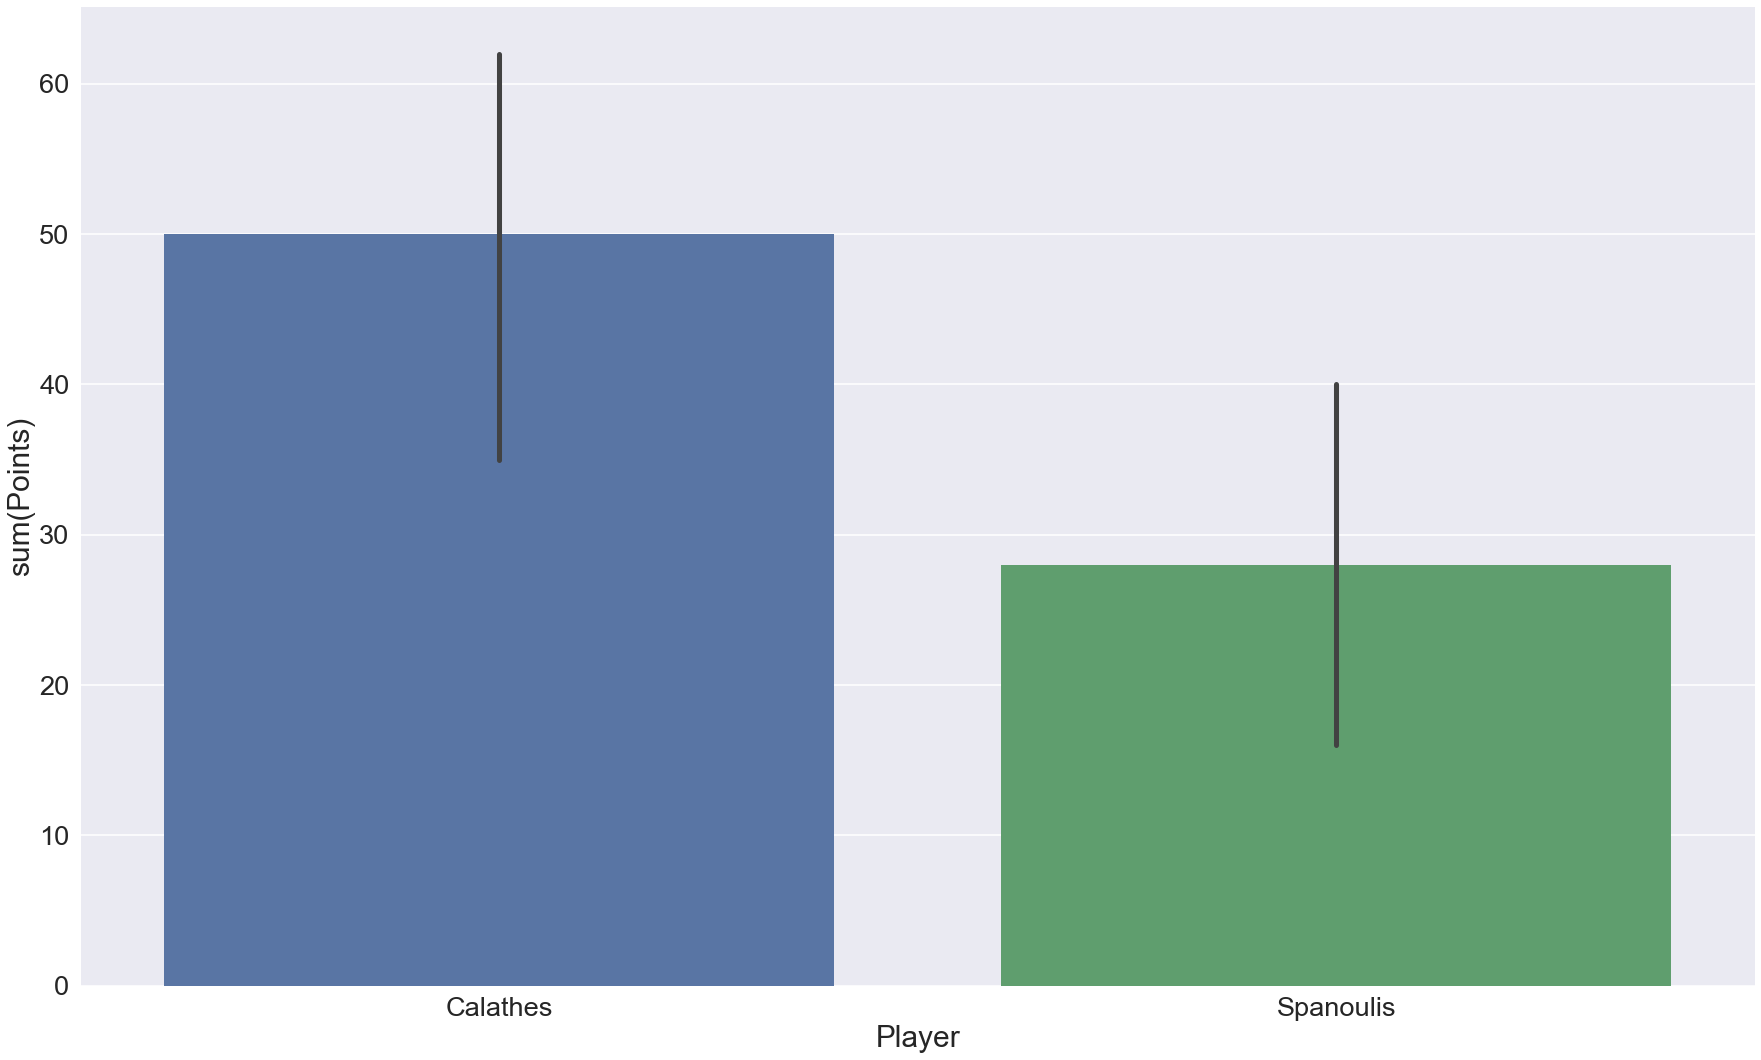

In [117]:
plt.figure(figsize=(30,18))
sns.set_context('poster',font_scale=1.7)
sns.barplot(x='Player', y='Points', data= df_test, estimator = np.sum, palette= 'deep' )

#### FUNCTION ΠΟΥ ΤΗΣ ΔΙΝΕΙΣ ΣΤΑΤΙΣΤΙΚΟ ΚΑΙ ΣΟΥ ΕΠΙΣΤΡΕΦΕΙ ΤΑ MAX ΑΝΑ ΑΓΩΝΑ

In [109]:
max_agwna = lambda x: df[df[x] == df.groupby(['Game'])[x].transform(max)].sort_values([x , 'Points'], ascending=[0,1])

In [111]:
max_agwna('Rebounds')

,Game,Team,Player,Points,Rebounds,Assists,Steals,Turnovers,1p,1p_sum,2p,2p_sum,3p,3p_sum,Minutes,Won,1p_in,2p_in,3p_in
9,one,pao,Bourousis,13.00,11.00,0.00,0.00,1.00,3.00,7.00,5.00,9.00,0.00,1.00,23.21,olympiakos,0.43,0.56,0.00
21,two,pao,Calathes,8.00,10.00,3.00,0.00,5.00,4.00,6.00,2.00,5.00,0.00,0.00,35.06,panathinaikos,0.67,0.40,nan
46,five,pao,James,11.00,10.00,6.00,0.00,2.00,2.00,3.00,3.00,6.00,1.00,4.00,30.13,panathinaikos,0.67,0.50,0.25
33,four,pao,Singleton,14.00,9.00,1.00,1.00,0.00,2.00,2.00,3.00,5.00,2.00,5.00,30.41,panathinaikos,1.00,0.60,0.40
88,three,osfp,Printezis,10.00,7.00,2.00,1.00,4.00,1.00,4.00,3.00,9.00,1.00,2.00,28.08,olympiakos,0.25,0.33,0.50


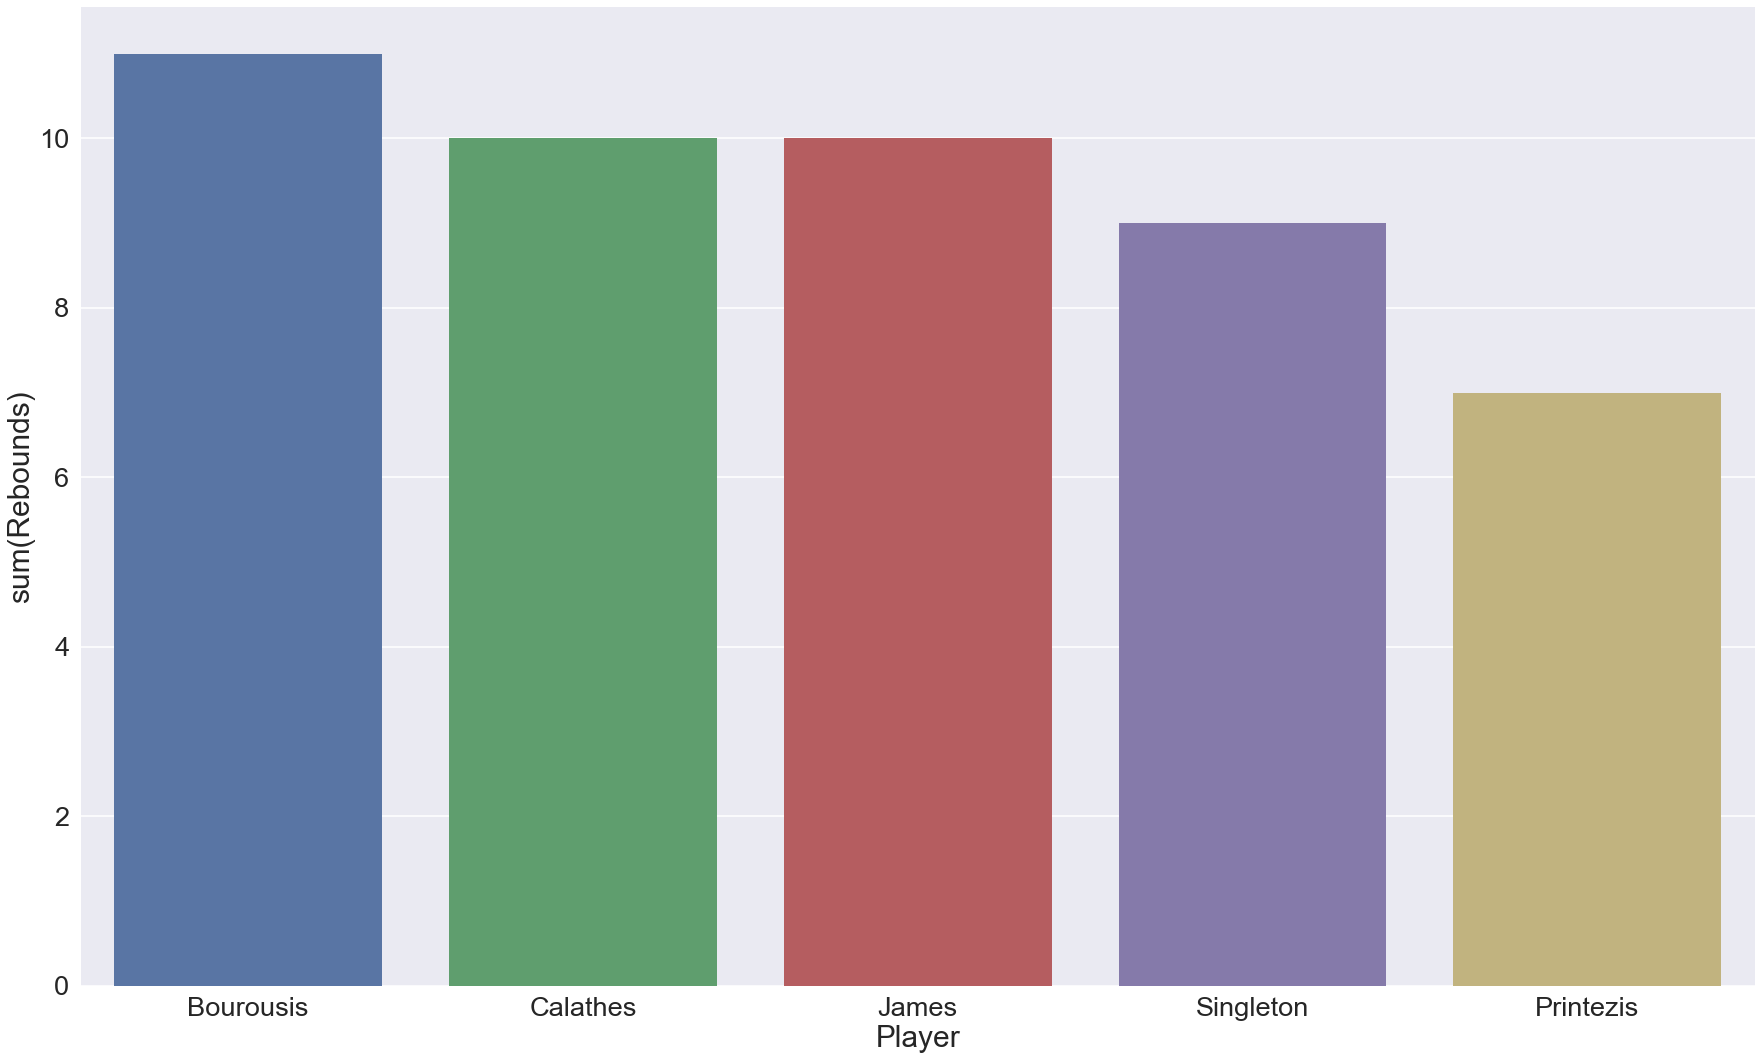

In [121]:
test_max = max_agwna('Rebounds')
#mean_p.sort_values(['Points','Player'], ascending=False, inplace=True)
plt.figure(figsize=(30,18))
sns.set_context('poster',font_scale=1.7)
sns.barplot(x='Player', y='Rebounds', data=test_max, palette="deep", estimator = sum)
#plt.savefig('assists_osfp.png')

#### FUNCTION ΠΟΥ ΔΙΝΕΙΣ ΤΗΝ ΟΜΑΔΑ ΚΑΙ ΣΟΥ ΕΠΙΣΤΡΕΦΕΙ ΤΟ ΣΥΝΟΛΟ ΤΩΝ ΧΑΡΑΚΤΗΡΙΣΤΙΚΩΝ ΟΛΩΝ ΤΩΝ ΠΑΙΧΤΩΝ ΧΩΡΙΣΤΑ ΚΑΙ ΣΤΟΥΣ ΠΕΝΤΕ ΑΓΩΝΕΣ

In [122]:
sum_paixtwn = lambda x: df.groupby(['Team','Player']).sum().loc[x].reset_index()

In [123]:
# Με το Function sum_paixtwn μπορούμε να φτιάξουμε διαγράμματα του στυλ, παίχτες με περισσότερους πόντους, περισσότερες
# ασσίστς, περισσότερα κλεψίματα κλπ. Ο τρόπος είναι ως εξής.
# Αποθήκευση σε νέο DataFrame, σορτάρισμα από μικρότερο σε μεγαλύτερο ή και ανάποδα και εμφάνιση διαγράμματος με Seaborn.

In [126]:
sum_paixtwn('osfp')

,Player,Points,Rebounds,Assists,Steals,Turnovers,1p,1p_sum,2p,2p_sum,3p,3p_sum,Minutes,1p_in,2p_in,3p_in
0,Agravanis,25.00,23.00,2.00,0.00,6.00,6.00,7.00,5.00,8.00,3.00,10.00,71.30,2.67,3.00,1.00
1,Birts,12.00,14.00,1.00,0.00,1.00,6.00,11.00,3.00,5.00,0.00,0.00,40.20,2.08,1.67,nan
2,Grin,54.00,11.00,6.00,2.00,4.00,7.00,8.00,7.00,23.00,11.00,19.00,92.26,1.67,1.29,2.35
3,Jang,24.00,5.00,1.00,1.00,2.00,6.00,9.00,9.00,18.00,0.00,0.00,42.62,2.10,2.90,nan
4,Mantzaris,23.00,16.00,14.00,2.00,3.00,2.00,2.00,3.00,8.00,5.00,19.00,130.68,1.00,1.67,1.25
5,Milutinov,38.00,24.00,3.00,1.00,7.00,8.00,11.00,17.00,22.00,0.00,0.00,105.89,1.47,3.88,nan
6,Papanikolaou,39.00,31.00,5.00,5.00,7.00,7.00,13.00,10.00,12.00,4.00,21.00,133.05,2.50,4.17,1.15
7,Papapetrou,22.00,16.00,2.00,1.00,6.00,2.00,6.00,4.00,10.00,4.00,11.00,93.78,1.00,1.42,2.00
8,Printezis,47.00,23.00,9.00,3.00,8.00,4.00,9.00,14.00,47.00,5.00,17.00,131.92,1.00,1.67,1.23
9,Spanoulis,28.00,9.00,27.00,1.00,13.00,12.00,17.00,5.00,11.00,2.00,18.00,112.83,3.17,1.13,0.38


In [133]:
# Αποθηκεύουμε σε νέο Dataframe το sum_paixtwn και το χρησιμοποιούμε στο σχεδιάγραμμα, βάζοντας επιλογή Assists για
# τους παίχτες του Ολυμπιακού. Με το .sort_values πετχαίνουμε το σορτάρισμα που θέλουμε. Με βάση τις ασσίστ
# από το μεγαλύτερο στο μικρότερο, για καλύτερη ομοιομορφία.

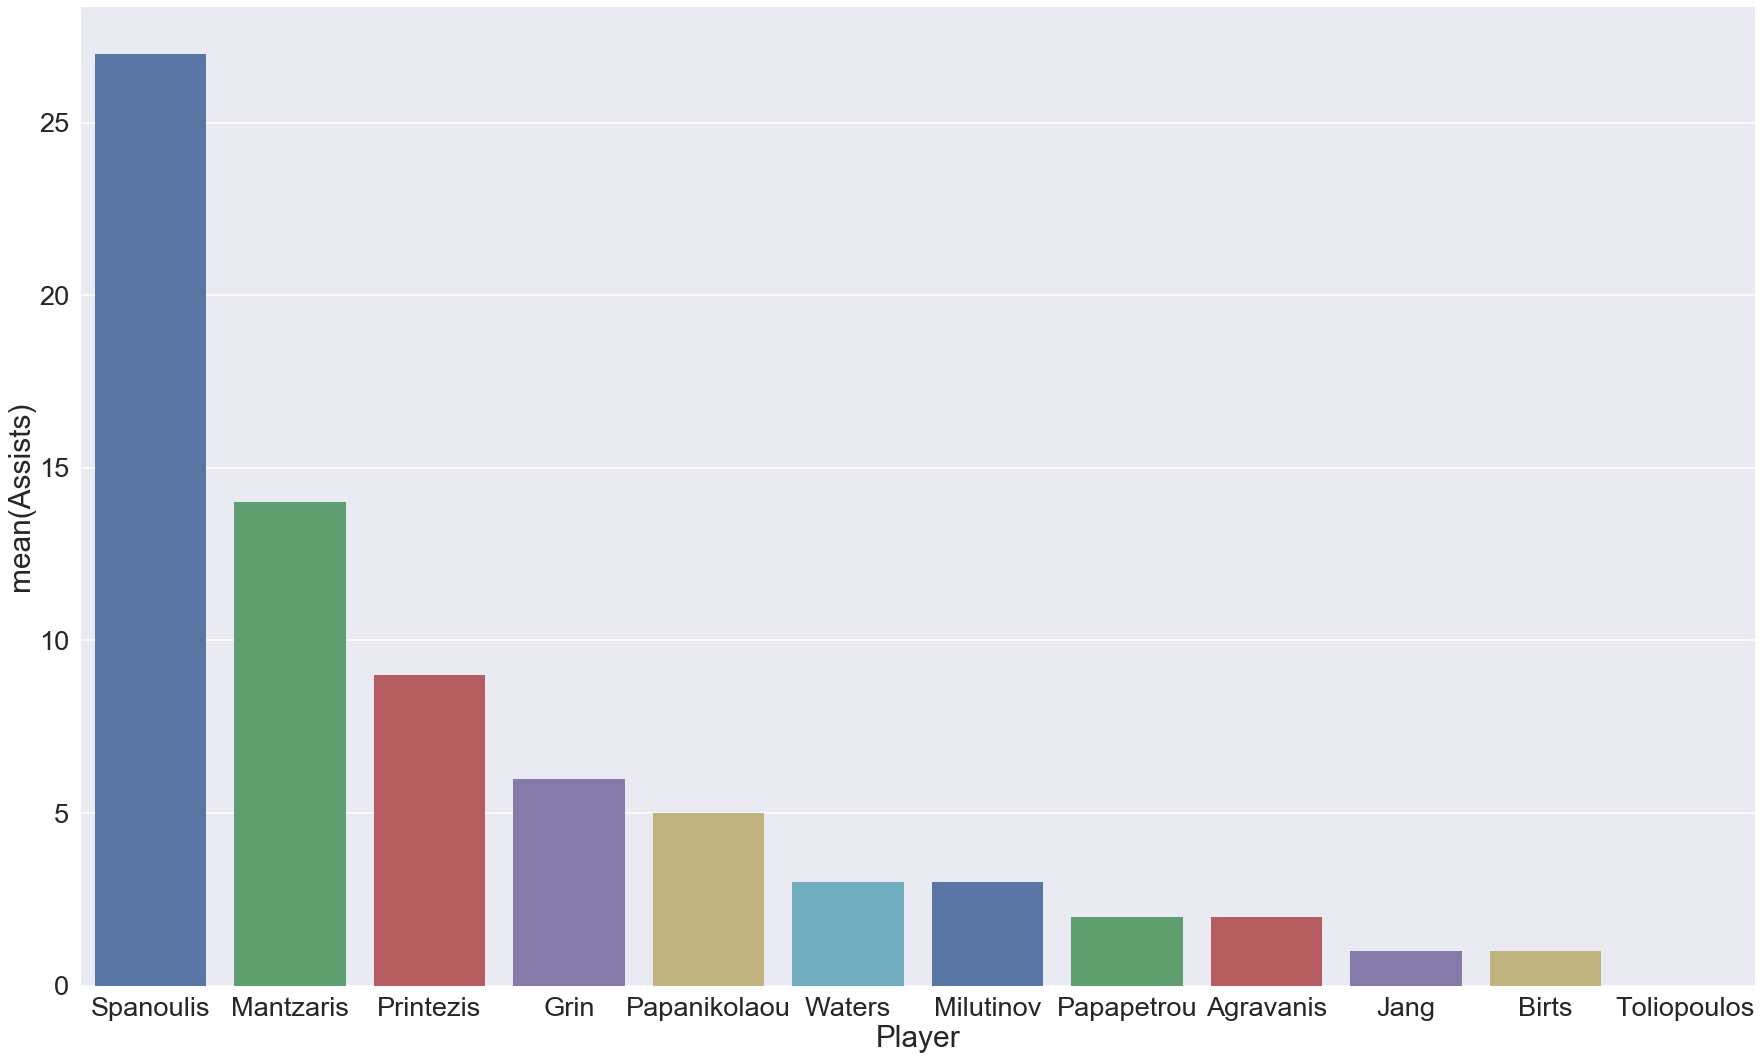

In [125]:
sum_p = sum_paixtwn('osfp')
sum_p.sort_values(['Assists','Player'], ascending=False, inplace=True)
plt.figure(figsize=(30,18))
sns.set_context('poster',font_scale=1.7)
sns.barplot(x='Player', y='Assists', data=sum_p, palette="deep")
#plt.savefig('assists_osfp.png')

#### FUNCTION ΠΟΥ ΔΙΝΕΙΣ ΤΗΝ ΟΜΑΔΑ ΚΑΙ ΣΟΥ ΕΠΙΣΤΡΕΦΕΙ ΤΟΝ Μ.Ο. ΤΩΝ ΧΑΡΑΚΤΗΡΙΣΤΙΚΩΝ ΟΛΩΝ ΤΩΝ ΠΑΙΧΤΩΝ ΧΩΡΙΣΤΑ ΚΑΙ ΣΤΟΥΣ ΠΕΝΤΕ ΑΓΩΝΕΣ

In [128]:
mean_paixtwn = lambda x: df.groupby(['Team','Player']).mean().loc[x].reset_index()

In [132]:
mean_paixtwn('pao')

,Player,Points,Rebounds,Assists,Steals,Turnovers,1p,1p_sum,2p,2p_sum,3p,3p_sum,Minutes,1p_in,2p_in,3p_in
0,Bourousis,9.40,6.20,0.80,0.40,1.20,2.60,4.20,3.40,6.80,0.00,0.60,17.92,0.67,0.47,0.00
1,Calathes,10.00,5.20,3.60,1.60,2.40,1.20,2.00,2.60,6.20,1.20,2.80,29.42,0.58,0.44,0.46
2,Feldein,2.00,0.60,0.60,0.20,0.40,0.00,0.00,0.40,1.20,0.40,1.20,11.68,nan,0.22,0.22
3,Fotsis,1.60,1.60,0.00,0.00,0.00,0.00,0.00,0.20,0.40,0.40,0.80,8.23,nan,0.50,0.50
4,Gabriel,4.80,1.80,0.40,0.60,0.20,0.00,0.00,0.60,0.80,1.40,1.80,14.27,nan,0.83,0.97
5,Gist,4.00,3.60,0.80,0.40,0.40,0.40,0.80,1.80,4.20,0.00,1.20,18.63,0.50,0.51,0.00
6,James,12.00,4.40,3.00,0.40,1.40,4.80,5.60,2.40,6.60,0.80,2.80,25.10,0.86,0.36,0.21
7,Pappas,6.40,1.20,1.20,1.40,0.40,2.60,2.60,1.00,2.00,0.60,3.40,17.37,1.00,0.50,0.14
8,Rivers,9.80,2.60,1.40,1.80,0.60,0.20,1.00,1.80,4.00,2.00,5.40,28.33,0.33,0.41,0.37
9,Singleton,8.20,6.00,0.60,0.40,1.20,1.60,2.40,1.80,5.00,1.00,3.20,24.93,0.69,0.30,0.26


In [ ]:
# Αποθηκεύουμε σε νέο DataFrame το mean_paixtwn και το βάζουμε να ψάξει τον μ.ο. των πόντων των παιχτών
# του Παναθηναικού. Με το .sort_values πετχαίνουμε το σορτάρισμα που θέλουμε. Με βάση τους πόντους
# από το μεγαλύτερο στο μικρότερο, για καλύτερη ομοιομορφία.

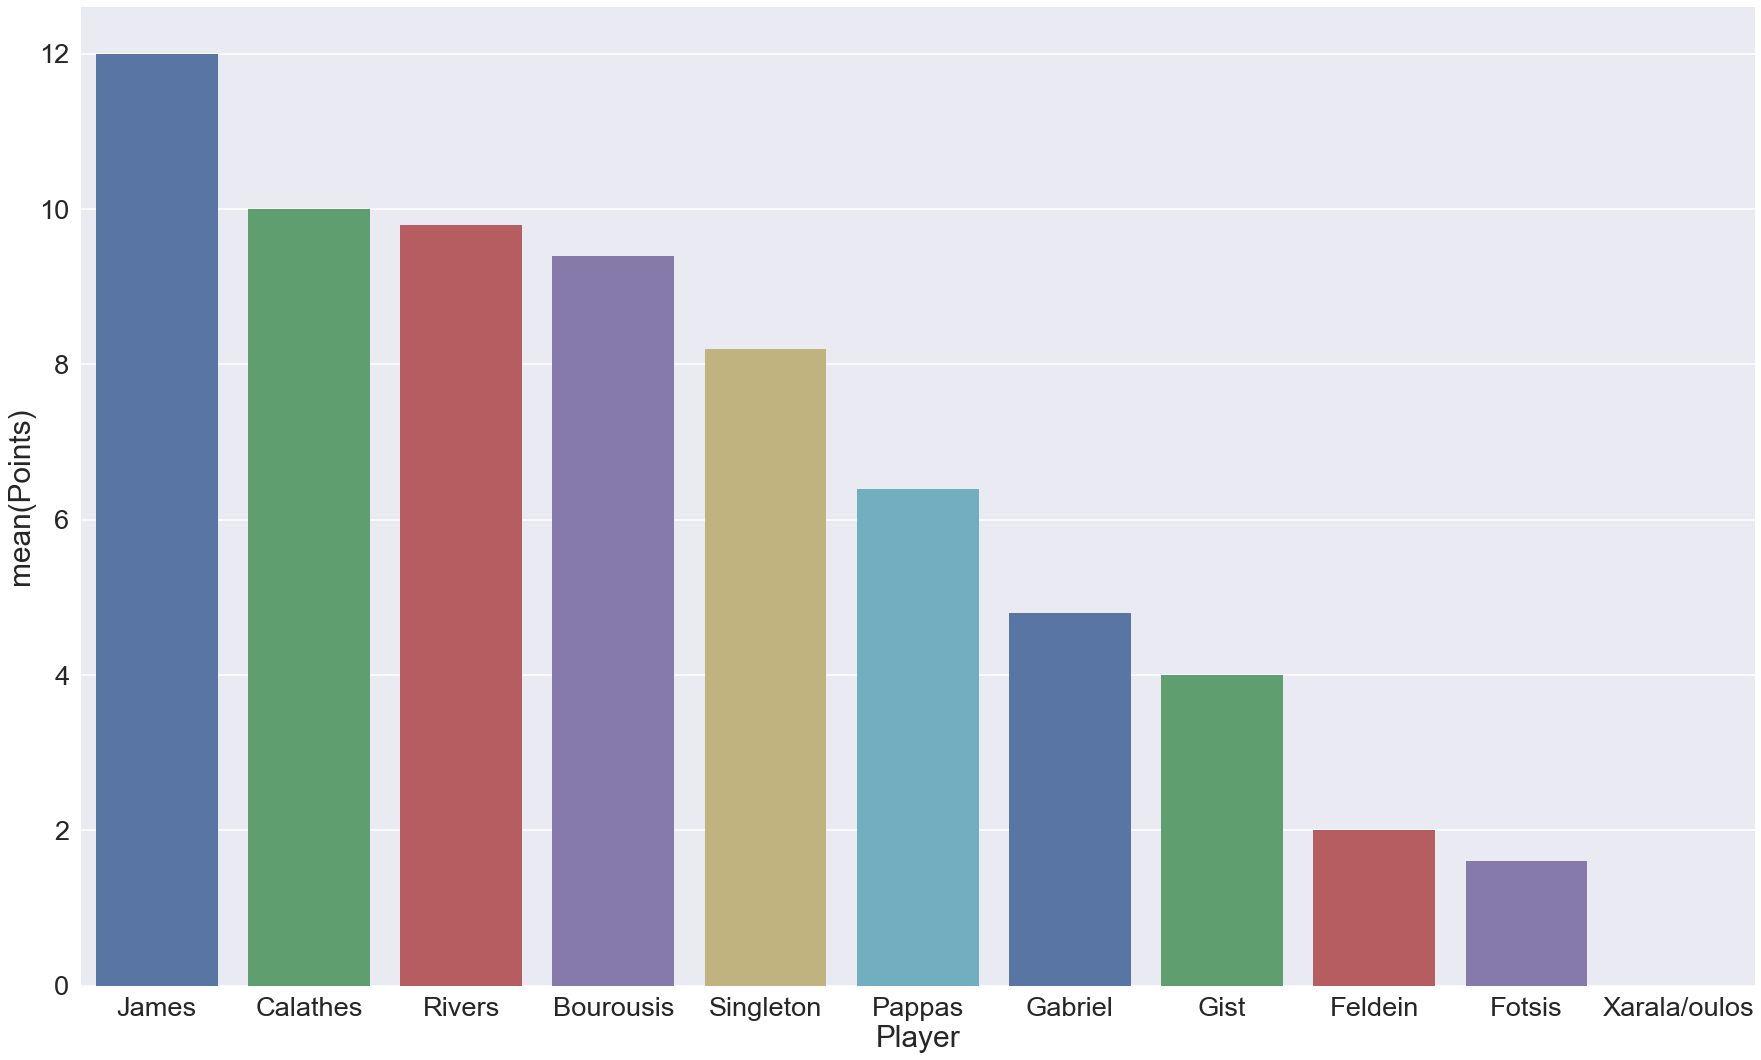

In [131]:
mean_p = mean_paixtwn('pao')
mean_p.sort_values(['Points','Player'], ascending=False, inplace=True)
plt.figure(figsize=(30,18))
sns.set_context('poster',font_scale=1.7)
sns.barplot(x='Player', y='Points', data=mean_p, palette="deep")
#plt.savefig('assists_osfp.png')